In [11]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np

In [12]:
pwd

'/content/drive/My Drive/WBA/gls'

In [10]:
cd ./drive/My Drive/WBA/gls

[Errno 2] No such file or directory: './drive/My Drive/WBA/gls'
/content/drive/My Drive/WBA/gls


In [0]:
path_very_good = "./carrot/extended_carrot/very_good2"
path_good = "./carrot/extended_carrot/good2"
path_bad = "./carrot/extended_carrot/bad2"

In [0]:
import os  #必ず必要
pic_list_very_good = os.listdir(path_very_good)
pic_list_good = os.listdir(path_good)
pic_list_bad = os.listdir(path_bad)

In [15]:
%tensorflow_version 1.x
#入力画像の読み込み
from tensorflow.python.keras.preprocessing.image import load_img
import numpy as np

#ロードした画像データを格納するからのリスト
# 猫の画像をロードして、リサイズ
  
img_list_very_good = [load_img(path_very_good+"/"+name,target_size=(224,224)) for name in pic_list_very_good]
print("VG")
img_list_good = [load_img(path_good+"/"+name,target_size=(224,224)) for name in pic_list_good]
print("G")
img_list_bad = [load_img(path_bad+"/"+name,target_size=(224,224)) for name in pic_list_bad]
print("B")

VG
G
B


In [0]:
from tensorflow.python.keras.preprocessing.image import img_to_array
def img_to_arr(img_list):
    arr_list = [img_to_array(img) for img in img_list]
    arr_list = np.array(arr_list)
    arr_list = arr_list/255
    return arr_list
arr_list_very_good = img_to_arr(img_list_very_good)
arr_list_good = img_to_arr(img_list_good)
arr_list_bad = img_to_arr(img_list_bad)

In [17]:
print(arr_list_bad.shape)
print(arr_list_good.shape)
print(arr_list_very_good.shape)

(686, 224, 224, 3)
(815, 224, 224, 3)
(686, 224, 224, 3)


In [18]:
from sklearn.model_selection import train_test_split
bad_train,bad_test= train_test_split(arr_list_bad)
good_train,good_test= train_test_split(arr_list_good)
very_good_train,very_good_test= train_test_split(arr_list_very_good)
print(bad_train.shape)
print(good_train.shape)
print(very_good_train.shape)

(514, 224, 224, 3)
(611, 224, 224, 3)
(514, 224, 224, 3)


In [19]:
x_train = np.hstack(([bad_train],[good_train],[very_good_train]))
x_train = x_train[0]
print(x_train.shape)
x_test = np.hstack(([bad_test],[good_test],[very_good_test]))
x_test = x_test[0]
print(x_test.shape)

(1639, 224, 224, 3)
(548, 224, 224, 3)


In [20]:
y_train=[[1,0,0] for i in range(bad_train.shape[0])]
for i in range(good_train.shape[0]):
    y_train.append([0,1,0])
for i in range(very_good_train.shape[0]):
    y_train.append([0,0,1])
y_train=np.array(y_train)
y_train.shape

(1639, 3)

In [21]:
y_test=[[1,0,0] for i in range(bad_test.shape[0])]
for i in range(good_test.shape[0]):
    y_test.append([0,1,0])
for i in range(very_good_test.shape[0]):
    y_test.append([0,0,1])
y_test=np.array(y_test)
y_test.shape

(548, 3)

In [22]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [23]:
from tensorflow.python.keras.applications.vgg16 import VGG16
vgg16 = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg16.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


58892288/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [0]:
model = None
model

In [0]:
# レイヤーの調整
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Flatten

def build_transfer_model(vgg16):
    model = Sequential(vgg16.layers)
    for layer in model.layers[:15]:
        layer.trainable = False

    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3,activation='sigmoid'))

    return model

model = build_transfer_model(vgg16)



In [26]:
from tensorflow.python.keras.optimizers import SGD
model.compile(
    loss='binary_crossentropy',
    optimizer=SGD(lr=1e-4, momentum=0.9),
    metrics=['accuracy']
)
# モデルのサマリを確認
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [27]:
import math
from tensorflow.python.keras.callbacks import TensorBoard
batch_s = 32
tsb = TensorBoard(log_dir='./logs')
steps_per_epoch = math.ceil(x_train.shape[0] / batch_s)
history_model= model.fit(
  x_train,
  y_train,
  batch_size= batch_s,
  epochs=100,
  validation_split=0.2,
  callbacks=[tsb]
)

Train on 1311 samples, validate on 328 samples
Epoch 1/100
1311/1311 [==============================] - 13s 10ms/sample - loss: 0.6594 - acc: 0.6278 - val_loss: 0.9668 - val_acc: 0.5681
Epoch 2/100
1311/1311 [==============================] - 5s 3ms/sample - loss: 0.5829 - acc: 0.6923 - val_loss: 1.0285 - val_acc: 0.5783
Epoch 3/100
1311/1311 [==============================] - 5s 4ms/sample - loss: 0.5526 - acc: 0.7244 - val_loss: 0.9662 - val_acc: 0.5915
Epoch 4/100
1311/1311 [==============================] - 5s 3ms/sample - loss: 0.5238 - acc: 0.7549 - val_loss: 0.8476 - val_acc: 0.6026
Epoch 5/100
1311/1311 [==============================] - 5s 3ms/sample - loss: 0.4955 - acc: 0.7796 - val_loss: 0.9263 - val_acc: 0.5671
Epoch 6/100
1311/1311 [==============================] - 5s 3ms/sample - loss: 0.4814 - acc: 0.7925 - val_loss: 0.9412 - val_acc: 0.5295
Epoch 7/100
1311/1311 [==============================] - 5s 3ms/sample - loss: 0.4633 - acc: 0.8014 - val_loss: 0.9166 - val_acc:

In [28]:
pre_y = model.predict(x_test).argmax(axis=1)
pre_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
from sklearn.metrics import confusion_matrix
# classification_report(y_test, pre_y, target_names=["bad", "good","very_good"])
print(confusion_matrix(y_test.argmax(axis=1), pre_y))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

[[168   1   3]
 [  2 201   1]
 [ 15  54 103]]
Test loss: 0.23682214711269323
Test accuracy: 0.9081509


人参モデル
[[168   1   3]
 [  2 201   1]
 [ 15  54 103]]
Test loss: 0.23682214711269323
Test accuracy: 0.9081509

In [0]:
model.save('./carrot/carrot_model.h5', include_optimizer=False)

In [31]:
pre_bad = model.predict(bad_test)
result_bad=pre_bad.argmax(axis=1)
result_bad

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
pre_good = model.predict(good_test)
result_good=pre_good.argmax(axis=1)
result_good

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [33]:
pre_very_good = model.predict(very_good_test)
result_very_good=pre_very_good.argmax(axis=1)
result_very_good

array([1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2,
       0, 1, 1, 2, 0, 0, 2, 1, 1, 2, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2])

In [34]:
y_test

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [35]:
print(result_bad.shape,result_good.shape,result_very_good.shape)

(172,) (204,) (172,)


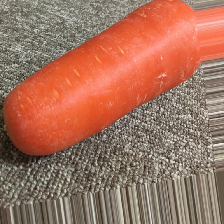

In [36]:
img_list_very_good[0]